<center>
<h1>Free groups and train-tracks with Sage</h1>
<h3>Thierry Coulbois, Marseille</h3>
<code>thierry.coulbois@univ-amu.fr</code><br>
    Cirm, Marseille, Sept, 12<sup>th</sup>, 2023
</center>

In [2]:
from train_track import *

<h2>1. Introduction</h2>
<h3>a) Historical background</h3>
<ul>
    <li>Main results [<a href="https://annals.math.princeton.edu/1991/135-1/p01">Bestvina-Handel, 1992</a>]: <strong style="color:red">Every iwip automorphism has a train-track representative.</strong> No strict statement about algorithmicity. 
    <li>Papers proving algorithmicity [<a href="https://www.worldscientific.com/doi/10.1142/S0218196716500028">Bogopolski-Maslakova, 2016</a>, 70 pages (<a href="https://arxiv.org/abs/1204.6728">arxiv</a>)], [<a href="https://londmathsoc.onlinelibrary.wiley.com/doi/abs/10.1112/blms/bdt093">Kapovich, 2013</a> (<a href="https://arxiv.org/abs/1209.3732">arxiv</a>), <a href="https://www.tandfonline.com/doi/abs/10.1080/10586458.2017.1326326?journalCode=uexm20">2016 (with M. Bell)</a> (<a href="https://arxiv.org/abs/1609.03820">arxiv</a>)] and [<a href="https://doi.org/10.1307/MMJ%2F1434731924">Clay-Mangahas-Pettet, 2014</a> (<a href="https://arxiv.org/abs/1402.7342">arxiv</a>)]. See also [<a href="https://doi.org/10.4171/GGD%2F466">Feighn-Handel, 2014</a> (<a href="https://arxiv.org/abs/1411.6302">arxiv</a>)].
    <li>Previously Java-applet [Brinkmann, 1999, <a href="https://arxiv.org/abs/math/9905155">arxiv</a>].
</ul>
<h3>b) Scope of the package</h3>
Package written 10 years ago, more than 10 000 lines of code (in Sage/Python).
    <ul>
    <li>Free Group Automorphisms (definition, inversion, composition, random walk);
    <li>Train track representative for Free Group Automorphisms (including relative train-tracks);
    <li>Index, Whitehead graphs.
    <li>(Some) Mapping class groups are concerned, braid groups.
    </ul>
<h3>c) See also</h3>
<ul>
    <li><a href="https://www.labri.fr/perso/weil/software/">P.&nbsp;Weil's package</a>: <code>stallings_graphs</code> to handle subgroups of free groups
    <li><a href="http://www.slabbe.org/Sage/">S.&nbsp;Labbe's package</a>: <code>slabbe</code> for tilings and continuous fractions
    <li><a href="https://www.i2m.univ-amu.fr/perso/paul.mercat/Programmes/Beta-adic/index.html">P.&nbsp;Mercat's package</a>: <code>badic</code> for automata, &beta;-numeration, Rauzy fractals
</ul>
<h3>d) ToDo</h3>
<ul>
    <li>Computing fixed subgroup of an automorphism;
    <li>Fixing bugs;
    <li>Use compression and pre-compilation;
    <li>...
     </ul>


<h2>2. An introduction to free groups and train-tracks</h2>

<h3>Free groups</h3> 

A free group is a group of reduced words on an alphabet (with inverses).

In [14]:
FreeGroup(3)

Free Group on generators {x0, x1, x2}

In [4]:
FreeGroup(5,names='a')

Free Group on generators {a0, a1, a2, a3, a4}

In [15]:
F = FreeGroup('a,b,c'); F

Free Group on generators {a, b, c}

<h3>Free group elements (words)</h3>

In [16]:
F('abacb')

a*b*a*c*b

In [11]:
w = F('abAbBc'); w

a*b*a^-1*c

In [17]:
print((w * w, w**5, w**-1))

((a*b*a^-1*c)^2, (a*b*a^-1*c)^5, c^-1*a*b^-1*a^-1)


In [13]:
(w**5).to_word()

word: abAcabAcabAcabAcabAc

In [9]:
w.to_word(use_str=False)

word: a,b,a^-1,c

<h3>Automorphism of free group</h3> 

A free group automorphism is determined by the image of the elements of a basis. Thus it can be described as a word morphism. <code>WordMorphism</code> is a well developed class in SageMath.

In [23]:
phi = FreeGroupAutomorphism("a->ab,b->ac,c->a")
phi

Automorphism of the Free Group on generators {a, b, c}: a->a*b,b->a*c,c->a

In [11]:
print(phi("aC"))

a*b*a^-1


In [21]:
phi*phi

Automorphism of the Free Group on generators {a, b, c}: a->a*b^-1*c^-1*a^-1,b->a*b^-1*a,c->a*b^-1

In [24]:
phi.inverse()

Automorphism of the Free Group on generators {a, b, c}: a->c,b->c^-1*a,c->c^-1*b

<h3><strong style="color:red">Exercise&nbsp;1:</strong> Length of $\varphi^n(a)$ ?</h3>

In [26]:
(phi**7)("a")
phi("a",7).to_word()
print(phi("a",7).to_word())

abacabaabacababacabaabacabacabaabacababacabaabacabaabacababacabaabacabacabaabacab


In [15]:
M = phi.rose_representative().matrix()
M

[1 1 1]
[1 0 0]
[0 1 0]

In [16]:
M.eigenvalues()

[1.839286755214161?, -0.4196433776070806? - 0.6062907292071993?*I, -0.4196433776070806? + 0.6062907292071993?*I]

So we have easily:
$$\lim_{n\to\infty}\frac 1n\log|\varphi^n(a)|= \log 1.839...$$

<h3>But what about inverses and cancellations?</h3>

In [28]:
phiinv = phi.inverse()
phiinv

Automorphism of the Free Group on generators {a, b, c}: a->c,b->c^-1*a,c->c^-1*b

In [29]:
phiinv("a",7).to_word()

word: AbAccAcc

In [31]:
f = phiinv.train_track()
f

Graph self map:
Marked graph: a: 0->0, b: 1->0, c: 1->0, e: 0->1
Marking: a->a, b->eb, c->ec
Edge map: a->ec, b->Ea, c->b, e->C
Irreducible representative

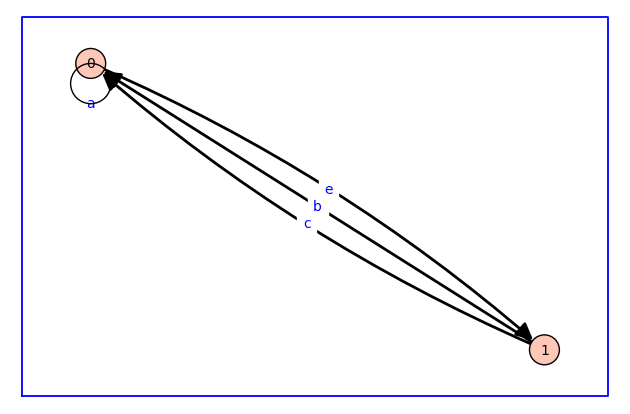

In [33]:
f.domain().plot()

In [21]:
Minv = f.matrix()
Minv

[0 1 0 0]
[0 0 1 0]
[1 0 0 1]
[1 1 0 0]

In [22]:
Minv.eigenvalues()

[-0.4746266175626056?, 1.395336994467073?, -0.4603551884522338? - 1.139317680301923?*I, -0.4603551884522338? + 1.139317680301923?*I]

So we have less easily:
$$\lim_{n\to\infty}\frac 1n\log|\varphi^{-n}(a)|=\log 1.39533...$$

<h2>3. Creating free group automorphisms</h2>

<p>The package offers several methods to create automorphisms</p>

<h3>3.1. Studying your favorite, personal automorphism</h3>

In [34]:
phi = FreeGroupAutomorphism("a->ABc,b->cd,c->ba,d->caCd")

In [37]:
phi('d')

c*a*c^-1*d

In [38]:
phi('c')

b*a

In [39]:
phi('a')

a^-1*b^-1*c

In [24]:
phi.inverse()

Automorphism of the Free Group on generators {a, b, c, d}: a->a^-1*c^-1*d*b^-1*(c*a)^2,b->c*(a^-1*c^-1)^2*b*d^-1*c*a,c->c*a,d->a^-1*c^-1*b

In [25]:
phi.inverse().to_word_morphism(use_str=True)
#phi.inverse().to_word_morphism(use_str=True,upper_case_as_inverse=True)
#phi.inverse().to_word_morphism(use_str=True,upper_case_as_inverse=True,compact=True)


WordMorphism: A->a^-1,c^-1,a^-1,c^-1,b,d^-1,c,a, B->a^-1,c^-1,d,b^-1,c,a,c,a,c^-1, C->a^-1,c^-1, D->b^-1,c,a, a->a^-1,c^-1,d,b^-1,c,a,c,a, b->c,a^-1,c^-1,a^-1,c^-1,b,d^-1,c,a, c->ca, d->a^-1,c^-1,b

In [26]:
phi.is_iwip()

True

In [27]:
f = phi.train_track(verbose=True,stable=False)

Expansion factor: 2.592052792386167?
Not yet train-track. Folding: [['d', 1], ('a', 'C')]
Reduction
Graph self map:
Marked graph: a: 0->0, b: 0->0, c: 0->0, d: 0->0
Marking: a->Ca, b->b, c->c, d->d
Edge map: a->c, b->cd, c->bCa, d->aCd
Irreducible representative 

Expansion factor: 2.324717957244746?
Not yet train-track. Folding: [['d', 2], ('c', 'd'), ('a', 'b')]
Reduction
Graph self map:
Marked graph: a: 0->0, b: 0->0, c: 1->0, d: 1->0, e: 0->1
Marking: a->CEa, b->ab, c->ec, d->ed
Edge map: a->ec, b->ed, c->bCEa, d->Cd, e->a
Irreducible representative 

Expansion factor: 2.256662888812165?
Absolute train-track !


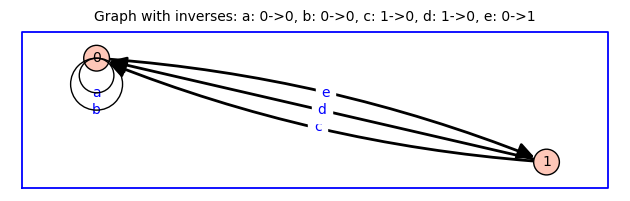

In [28]:
f.domain()

In [29]:
f.periodic_nielsen_paths()

[]

In [30]:
f.index_list()

[3]

In [31]:
phi.index_list()

[3]

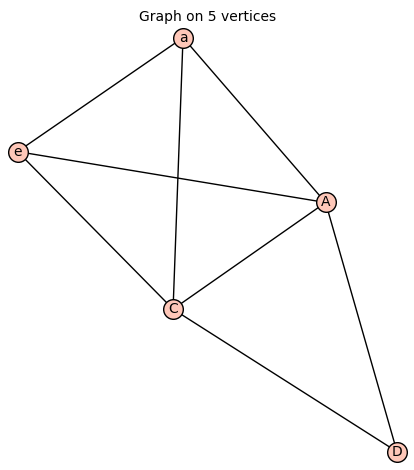

In [32]:
f.ideal_whitehead_graph()

<h3>3.2. Using Aut(F_N) generators</h3>

In [43]:
F 

Free Group on generators {a, b, c}

In [33]:
FreeGroupAutomorphism.Nielsen_automorphism(F,"a","b")

Automorphism of the Free Group on generators {a, b, c}: a->a*b,b->b,c->c

<h3>3.3. Scrolling through the litterature</h3>

In [40]:
free_group_automorphisms.Bestvina_Handel_train_track_3_6?

In [34]:
phi = free_group_automorphisms.Jolivet()
phi

Automorphism of the Free Group on generators {a, b, c, d}: a->d*b,b->d*c,c->d,d->a

In [35]:
f = phi.train_track()

In [46]:
phi.is_iwip()

False

<h3>3.4. Mapping classes and braids</h3>

In [42]:
F = FreeGroup(4)
FreeGroupAutomorphism.surface_dehn_twist(F,4)

Automorphism of the Free Group on generators {x0, x1, x2, x3}: x0->x0,x1->x2*x0^-1*x1,x2->x2,x3->x3*x0*x2^-1

In [48]:
FreeGroupAutomorphism.braid_automorphism(F,2)

Automorphism of the Free Group on generators {x0, x1, x2, x3}: x0->x0,x1->x1*x2*x1^-1,x2->x1,x3->x3

<h3>3.5 Random automorphisms <strong style="color:red">to test your conjectures</strong></h3>

In [49]:
FreeGroupAutomorphism.random_automorphism(F,10)

Automorphism of the Free Group on generators {x0, x1, x2, x3}: x0->x3^-1*x0*x1^-1*x2*x0*x1^-1*x3,x1->x1,x2->x3^-1*x0*x1^-1*x2*x0*x1^-1*x3*x2*x0*x3,x3->x3^-1*x0^-1*x2^-1*x3^-1*x1*x0^-1*x2^-1*x1*x0^-1*x3^2

<h4><strong style="color:red">Random automorphisms are iwip</strong> [<a href="https://www.degruyter.com/view/j/crll.ahead-of-print/crelle-2015-0076/crelle-2015-0076.xml">Maher-Tiozzo, 2016</a>]</h4>

In [43]:
N = 100; L = 20
non_iwip = 0
for i in range(N):
    phi = FreeGroupAutomorphism.random_automorphism(F,L)
    if not phi.is_iwip():
        print(i,":",phi)
        non_iwip += 1
    if i%10 == 0:
        print(non_iwip,"/",i)
        
print("Among",N,"random automorphisms (with random length of length", L,"), there were",non_iwip,"non iwip.")

0 / 0
0 / 10
11 : x0->x1*x0*(x1^-1*x0^-1)^2*x3*x1*x0^-2*x1^-1*x2*x3^-1*x0*x1*x0*x1^-1*x0^-1*x3*x2^-1*x1*x0^2*x1^-1*x3^-1*(x0*x1)^2*x0^-1*x1^-1,x1->x1*x0^-2*x1^-1*x2*x3^-1*x0*x1*x0^-1*x1^-1,x2->(x1*x0^-2*x1^-1*x2)^2*x3^-1*x0*x1*x0^-1*x1^-1,x3->x0^-1*x3*x2^-1*x1*x0^2*x1^-1*x3^-1*(x0*x1)^2*x0^-1*x1^-1
12 : x0->x2*x0*x1^-1*x0^3*x3^-1*x0^-1*x1*x0^-1*x2^-1,x1->x1,x2->x2*x0*x1^-1*x0*x3*x0^-2*x3*x0^-1*x1^-1*x2*(x0*x1^-1)^2,x3->x2*x0*x1^-1*x0^2*x1^-1
14 : x0->(x1*x3^-1*x2)^2*x1*x2*x1*x3^-1*x2*x1^-2*x2*x0*x1,x1->x1*x3^-1*x2*x1^2*x2^-1*x3*x1^-1*x2^-1,x2->x1*x3^-1*x2*x1*x2^-1*x3*x1^-1*x2^-1*x1*x3^-1*x2*(x2*x1*x3^-1*x2*x1^-1*x2^-1*x3*x1^-1)^2,x3->x2*x1*x3^-1*x2*x1^-1*x2^-1*x3*x1^-1
3 / 20
3 / 30
37 : x0->x3*(x2^-1*x1*x3^-1*x1^-1*x0*x2^-1*x1^2*x3^-1*x1^-1*x0*x3^-1*x1^-1*x2*x0^-1*x1*x3*x1^-2*x2*x0^-1*x1*x3*x2^-1*x1)^2*x3^-1*x1^-1*x0*x2^-1*x1,x1->x1*x3^-1*x1^-1*x0*x2^-1*x1*x3*x0^-1*x1*x3*x1^-2*x2*x0^-1*x1*x3*x1^-1*x2*x3^-1*x1^-1*x0*x2^-1*x1,x2->x1^-1*x2*x0^-1*x1*x3*x1^-1*x2*x3^-1*x1^-1*x0*x2^-1*x1^2*x

<h4><strong style="color:red">Random mapping classes are pseudo-Anosov</strong> [<a href="https://arxiv.org/abs/math/0703532">Rivin, 2008</a>]</h4>

In [50]:
N = 100; L = 20
non_iwip = 0
for i in range(N):
    phi = FreeGroupAutomorphism.random_mapping_class(F,L)
    if not phi.is_iwip():
        print(i,":",phi)
        non_iwip += 1
    if i%10 == 0:
        print(non_iwip,"/",i)
        
print("Among",N,"random automorphisms (with random length of length", L,"), there were",non_iwip,"non pseudo-Anosov.")

0 : x0->x0,x1->x0*(x0*x2^-1)^2*x3^-1*x0*x2^-1*x1,x2->x0*(x0*x2^-1)^2*x3^-1*(x2*x3*x2*x0^-1)^2*x2*x0^-1,x3->x0*(x0*x2^-1)^2*x3^-1*x2*(x3*x2*x0^-1)^2*x2*x0^-2
1 / 0
4 : x0->x1^-1*x3^-1*x2^-1*x3^-1*x0^-1,x1->x1^-1*x3^-1*x2^-1*x3^-1*x2*x3*x1,x2->x0^2*x3*x0^-1,x3->x0*x3^-1*x0^-1*x1
5 : x0->x0^-1*x1^-2*x2*x0^-1*x1*x0,x1->x0^-1*x1^-1*(x1^-1*x2*x0^-1)^2*x1^-1,x2->x0^-1*x1^-2*x2*x0^-1*x1^-1*x2*x1*x0*x2^-1*x1^2*x0,x3->x0^-1*x1^-2*x2*x0^-1*x1^-1*x2^-4*x3*x1*(x1*x0*x2^-1)^2*x1^2*x0
9 : x0->x1^-1*x0^-1*x1^-1,x1->(x1*x0)^2*x1,x2->(x1*x0)^2*x2^-3*x3*x2*(x0^-1*x1^-1)^2,x3->(x1*x0)^2*x2^-1*(x2^-2*x3)^3*(x0^-1*x1^-1)^2
4 / 10
17 : x0->x1^-1*x2*x0,x1->(x1^-1*x2*x0)^2*x1^-1*x0*x2^-1*x1,x2->x1^-1*x2*x0*x1^-1*x2*x1*x0^-1*x2^-1*x1,x3->x1^-1*x2*x0*x1^-1*x2^3*x3*x2*x0^-1*(x1*x0^-1*x2^-1)^2*x1
19 : x0->x0,x1->x1,x2->((x2*x3)^2*x2)^2*x3*x2,x3->(x2^-1*x3^-1)^2*x2^-1
6 / 20
6 / 30
34 : x0->x0,x1->x0^-1*x3*(x2*x0^-1*x3*x2*x0^-1)^2*x2*x3*(x2*x0^-1*x3*x2*x0^-1)^2*x3*x2*x0^-1*x1,x2->x0^-1*x3*(x2*x0^-1*x3*x2*x0^-1)^2*x

<h2>4. More Free Group Automorphism invariants</h2>

<h3>4.1 Fixed infinite words</h3>

<p>What is known as fixed attracting words or attracting subshifts for substitutions, have to be defined as attracting laminations for iwip automorphisms of free groups.</p>

<p>The <strong style="color:red">index</strong>, <strong style="color:red">index list</strong> (and more detailed Ideal Whitehead Graph) count the "attracting fix points". </p> 

<p>An iwip automorphism <code>phi</code> of the Free Group <code>F</code> of rank r is represented by a pseudo-Anosov mapping class if, and only if, the indices of both <code>phi</code> and <code>phi.inverse()</code> are maximal: 2r-2.</p>

In [45]:
phi

Automorphism of the Free Group on generators {x0, x1, x2, x3}: x0->x2*x0^-1*x1^2*x2*x0^-1*x1*x0,x1->x2*x0^-1*x1^2,x2->x0^-1*x1*x3^-1*x2^-1*x3*x1^-1*x0,x3->x0^-1*x1*x3^-1*x2

In [47]:
phi.is_iwip()

False

In [54]:
phi.inverse().index_list()

[2, 1, 1, 1, 1]

<p><strong style="color:red">Botany of iwip automorphisms</strong>: geometric, parageometric, pseudo-Levitt [<a href="http://arxiv.org/abs/1201.1169">Coulbois, Hilion, 2012</a>].</p>

<p>We cand provide an iwip automorphism with any prescribed index list [<a href="http://arxiv.org/abs/1506.04536">Coulbois, Lustig, 2015</a>].



<h3>4.2 Relative train tracks</h3>

<p>When a free group automorphism <code>phi</code> is not iwip we can still compute a <strong style="color:red">relative train-track</strong>. The program computes the original [Bestvina, Handel, 1992] relative train-tracks. There are now enhanced versions, CT-train-tracks, better train-tracks, ...</p>

<p>We are still looking for a complete invariant of conjugacy classes in Out(F_n):</p>

<p><strong style="color:red">Conjecture: there is an algorithm to decide whether two free group automorphisms <code>phi</code> and <code>psi</code> are conjugate in Out(F_n).</strong></p>

In [48]:
phi = free_group_automorphisms.Turner_Stallings()
phi.to_word_morphism(compact=True)

WordMorphism: a->dac, b->CADac, c->CABac, d->CAbc

In [49]:
f = phi.train_track()

In [62]:
f

Graph self map:
Marked graph: a: 2->2, b: 4->4, c: 4->2, e: 2->4, d: 4->2
Marking: a->aDEA, b->aDbEA, c->aec, d->A
Edge map: a->B, b->Cda, c->e, e->d, d->C
Strata: [['c', 'd', 'e'], ['a', 'b']]

<h3>4.3 Decomposition by Stallings foldings</h3>

<p>Looking for prefered geodesics in Out(F_N) leads to either fold (or unfold) free group automorphisms. <strong style="color:red">Every graph map can be decomposed as a finite sequence of elementary foldings<strong> [Stallings, 1983].</p>

<h3>4.4 Trees</h3>

<h3>4.5 Convex cores</h3>